## Data Generation

In [148]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

np.random.seed(12)
num_observations = 5000
x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

# Titanic survival~~~~~~~~~~~~~~~~
df = pd.read_csv('train.csv',header=0,usecols=['Survived','Sex','Age'])
df= df.dropna(axis=0)
df['Age'] = (df['Age'] - df['Age'].mean()) / df['Age'].std()
x11=df.iloc[:,1:].values

for i in np.arange(x11.shape[0]):
    if x11[i,0]=='female':
        x11[i,0]=0.
    else:
        x11[i,0]=1.
        
y=df.iloc[:,0].values
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# simulated_separableish_features = np.vstack((x1, x2)).astype(np.float32)
# simulated_labels = np.hstack((np.zeros(num_observations),
#                               np.ones(num_observations)))
# print(simulated_separableish_features.shape,simulated_labels.shape)

simulated_separableish_features = x11.astype(np.float32)
simulated_labels = y

print(x11.astype(np.float32).shape,y.shape)
print(simulated_separableish_features[:4,:])

(714, 2) (714,)
[[ 1.         -0.5300051 ]
 [ 0.          0.57143039]
 [ 0.         -0.25464621]
 [ 0.          0.36491126]]


## Data Visualisation 

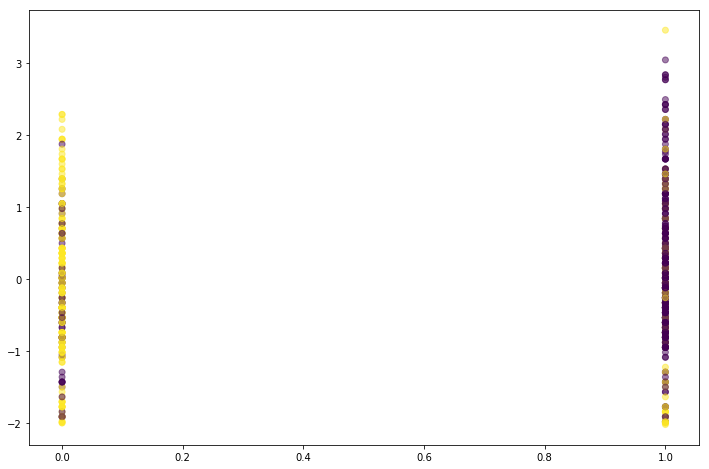

In [149]:
plt.figure(figsize=(12,8))
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1],
            c = simulated_labels, alpha = .5)

## Sigmoid Function

In [143]:
def sigmoid(x):
    '''1 / (1 + e^(-x))'''
    return 1 / (1 + np.exp(-x))

## Log-Likelihood

In [144]:
def log_likelihood(features, target, weights):
    '''
        U = sum(target * weights_tr * features - log(1 + exp(weights_tr * features)))
    '''
    scores = np.dot(features, weights)
    ll = np.sum( target * scores - np.log(1 + np.exp(scores)) )
    return ll

## Gradient of the Log-likelihood

In [145]:
def grad(features, target, predictions):
    '''
        grad(U) = features_tr * (target - predictions)
    '''
    output_error_signal = target - predictions
    gradient = np.dot(features.T, output_error_signal)
    
    return gradient
    

## Logistic regression

In [146]:
def logistic_regression(features, target, num_steps, learning_rate):
    # add free coefficients as 1
    features = np.hstack(
        (np.ones((features.shape[0], 1)),features))
    
    # initialize weights
    weights = np.zeros(features.shape[1])
    
    # iterative process
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)
        
        # Update weights with gradient
        gradient = grad(features, target, predictions)
        weights += learning_rate * gradient
        
        # Print log-likelihood every so often
        if step % 10000 == 0:
            print(log_likelihood(features, target, weights))
        
    return weights

In [147]:
weights = logistic_regression(simulated_separableish_features, simulated_labels,
                     num_steps = 1000, learning_rate = 5e-5)

-493.761207083


## Check results on data

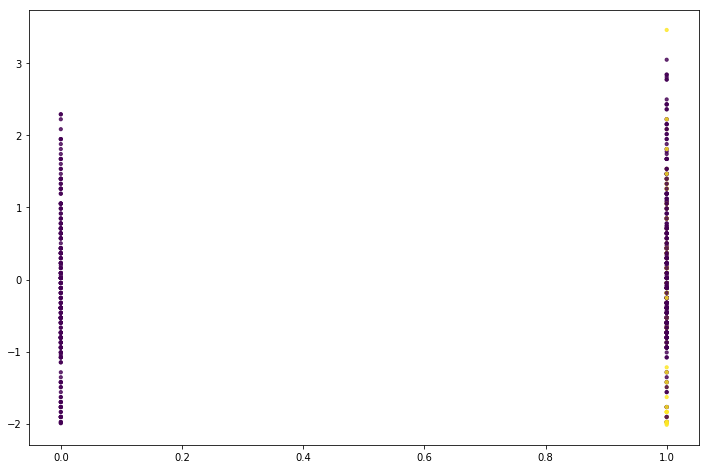

In [151]:
data_with_intercept = np.hstack((np.ones((simulated_separableish_features.shape[0], 1)),
                                 simulated_separableish_features))
final_scores = np.dot(data_with_intercept, weights)
preds = np.round(sigmoid(final_scores))

plt.figure(figsize = (12, 8))
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1],
            c = preds == simulated_labels - 1, alpha = .8, s = 10)